## ALL ABOUT RASTER DATA

### RASTER DATA: Raster is an image composed of square pixels of constant size.
### Each Pixel has a numeric value ie digital number
### Values can be assigned to a specific color or shade
### Ideal for Continuous data

#### Eg Digital Elevation Model: Raster Pixel Values represent elevations
#### Eg Climate Change: Raster Pixel Values represent annual Rainfall

### Pixel Values are called DN(ie Digital Numbers)

#### Rasters are displayed by assigning number to each color
#### Low numbers are dark, high nubers are bright

### Single Band: A single raster layer.
### Colors are limited to shades of a single color
### Multi Band Rasters: Same Image collected over different bandwith intervals

## ZONAL STATISTICS

### In Zonal Statistics,statistics is calculated for each zone defined by a dataset based on values on another dataset(known as value raster.A single value is computed for every zone in input zonal dataset.

### Here in this example we are using a shape file depicting districts of Portugal and rainfall raster on a given date.For each district in portugal depicted in shape file, we calculate average rainfall on that particular day using pixel values of rainfall raster

In [2]:
import rasterio
import geopandas as gpd
import rasterstats

###  Average rainfall fallen on particulr day in each district

### Plotting shp file

<AxesSubplot:>

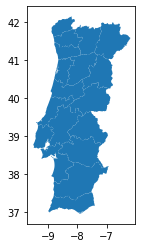

In [4]:
districts=gpd.read_file(r'C:\Users\Admin\Desktop\Python_Sem3\Raster_Data\districts.shp')
districts.plot()

### Reading Rainfall Raster

In [5]:
rf=rasterio.open(r'C:\Users\Admin\Desktop\Python_Sem3\Raster_Data\2020-4-15.tif')

### Plotting Rainfall Raster

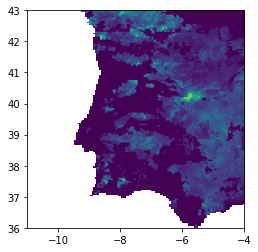

<AxesSubplot:>

In [59]:
from rasterio.plot import show
show(rf)

In [7]:
import matplotlib.pyplot as plt

### Plotting raster and shape file together. BAsically Plotting district shp on raster to seee clear district boundaries on raster

<AxesSubplot:>

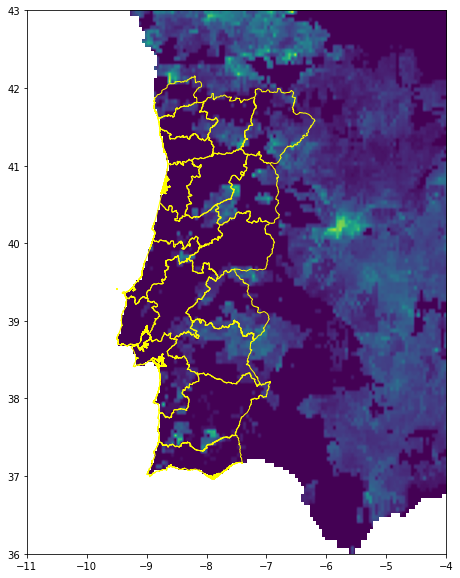

In [8]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
show(rf,ax=ax)
districts.plot(ax=ax,facecolor='None',edgecolor="yellow")

In [9]:
from rasterio.plot import show_hist

### We can also plot histogram of raster data 

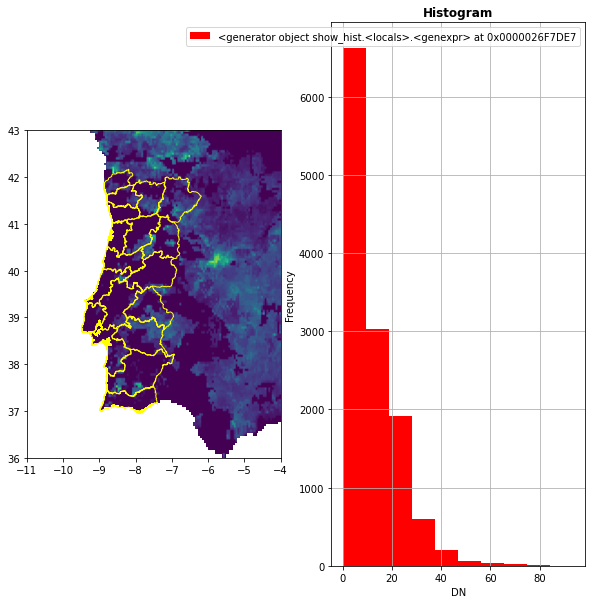

In [27]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,10))
show(rf,ax=ax1)
districts.plot(ax=ax1,facecolor='None',edgecolor="yellow")
show_hist(rf,ax=ax2)

In [34]:
rf.read(1)

array([[-9999., -9999., -9999., ...,     0.,     0.,     0.],
       [-9999., -9999., -9999., ...,     0.,     0.,     0.],
       [-9999., -9999., -9999., ...,     0.,     0.,     0.],
       ...,
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],
      dtype=float32)

### Assign Raster Values to a numpy array

In [19]:
rainfall_array=rf.read(1)
rainfall_array

array([[-9999., -9999., -9999., ...,     0.,     0.,     0.],
       [-9999., -9999., -9999., ...,     0.,     0.,     0.],
       [-9999., -9999., -9999., ...,     0.,     0.,     0.],
       ...,
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],
      dtype=float32)

In [20]:
type(rainfall_array)

numpy.ndarray

In [13]:
rf.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -9999.0,
 'width': 140,
 'height': 140,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.0500000007451, 0.0, -11.0,
        0.0, -0.0500000007451, 43.0)}

In [14]:
rf.nodata

-9999.0

In [15]:
rf.transform

Affine(0.0500000007451, 0.0, -11.0,
       0.0, -0.0500000007451, 43.0)

In [21]:
affine=rf.transform

### Calculating Zonal Statistics

In [24]:
average_rf=rasterstats.zonal_stats(districts,rainfall_array,affine=affine,stats=['mean'],geojson_out=True)

In [25]:
average_rf

[{'id': '0',
  'type': 'Feature',
  'properties': {'NAME_1': 'Évora', 'mean': 10.884027523599613},
  'geometry': {'type': 'Polygon',
   'coordinates': (((-8.14205360412592, 39.015289306640625),
     (-8.141647338867188, 39.014663696289176),
     (-8.141536712646428, 39.01450729370123),
     (-8.141264915466309, 39.01403427124018),
     (-8.140393257141056, 39.01247787475597),
     (-8.139412879943848, 39.01243209838873),
     (-8.13868522644043, 39.012397766113395),
     (-8.136157989501953, 39.01227188110363),
     (-8.134222030639592, 39.01218032836914),
     (-8.132843017578068, 39.01210403442394),
     (-8.132230758666935, 39.012130737304744),
     (-8.128972053527775, 39.012218475341854),
     (-8.128927230834961, 39.01230621337896),
     (-8.129116058349553, 39.01317214965826),
     (-8.12927055358881, 39.013931274414176),
     (-8.129427909851074, 39.014736175537166),
     (-8.129475593566895, 39.014923095703125),
     (-8.129505157470646, 39.015029907226676),
     (-8.129521369

### Extracting Average Rainfall from the list

In [43]:
average_rainfall=[]
i=0
while i<len(average_rf):
    average_rainfall.append(average_rf[i]['properties'])
    i=i+1
average_rainfall

[{'NAME_1': 'Évora', 'mean': 10.884027523599613},
 {'NAME_1': 'Aveiro', 'mean': 0.0},
 {'NAME_1': 'Beja', 'mean': 5.332767344903255},
 {'NAME_1': 'Braga', 'mean': 4.8678589781125385},
 {'NAME_1': 'Bragança', 'mean': 11.206016924364347},
 {'NAME_1': 'Castelo Branco', 'mean': 1.272396619696366},
 {'NAME_1': 'Coimbra', 'mean': 3.267679367746626},
 {'NAME_1': 'Faro', 'mean': 2.0973847097563514},
 {'NAME_1': 'Guarda', 'mean': 9.654524584019438},
 {'NAME_1': 'Leiria', 'mean': 2.64304256439209},
 {'NAME_1': 'Lisboa', 'mean': 0.5819326606956688},
 {'NAME_1': 'Portalegre', 'mean': 9.79167668275007},
 {'NAME_1': 'Porto', 'mean': 0.0},
 {'NAME_1': 'Santarém', 'mean': 2.6609259992307615},
 {'NAME_1': 'Setúbal', 'mean': 4.506786451889918},
 {'NAME_1': 'Viana do Castelo', 'mean': 7.07890306909879},
 {'NAME_1': 'Vila Real', 'mean': 8.453806025459167},
 {'NAME_1': 'Viseu', 'mean': 4.682013974999482}]

In [44]:
import pandas as pd


### Converting List into a dataframe

In [46]:
average_rf_portugal=pd.DataFrame(average_rainfall)
average_rf_portugal

,NAME_1,mean
0,Évora,10.884028
1,Aveiro,0.000000
2,Beja,5.332767
3,Braga,4.867859
4,Bragança,11.206017
5,Castelo Branco,1.272397
6,Coimbra,3.267679
7,Faro,2.097385
8,Guarda,9.654525
9,Leiria,2.643043


<AxesSubplot:title={'center':'Average Rainfall on 4th april 2020 in districts of portugal'}, xlabel='NAME_1'>

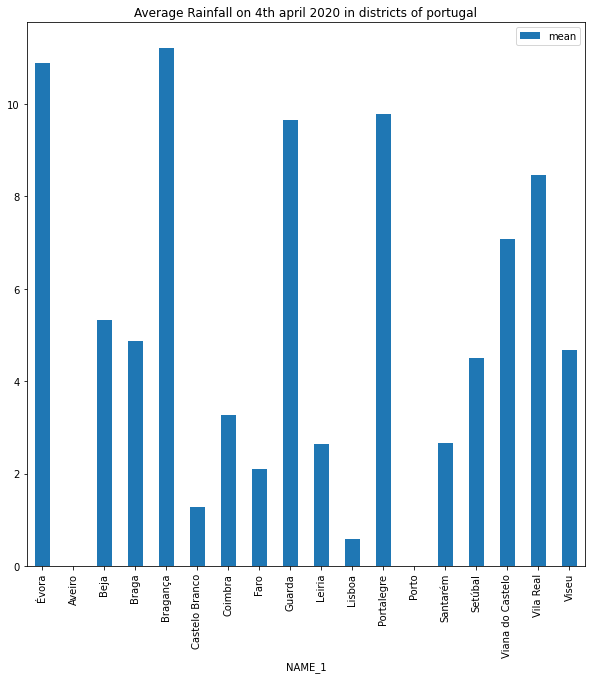

In [57]:
average_rf_portugal.plot(x='NAME_1',y='mean',title='Average Rainfall on 4th april 2020 in districts of portugal',kind='bar',figsize=(10,10))